<a href="https://colab.research.google.com/github/Phonghuynh66/Artificial-Intelligence-Class/blob/master/CNN_Recognition_members_in_AIclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Huynh Quoc Phong _ 20149078 
# Nhan dien mot so thanh vien trong lop AI


In [2]:
from os import listdir
import numpy as np
from numpy import asarray, save
from keras.utils import load_img, img_to_array
from google.colab import drive 
from keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,LeakyReLU,Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras import losses

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

folder='/content/drive/MyDrive/Face'
photos,labels=list(),list()

for file in listdir(folder):
    if file.endswith(('.jpg', '.bmp', '.png')):
     output=0
     if file.startswith('Lam'):
       output=1
     if file.startswith('Nhat'):
       output=2
     if file.startswith('Phong'):
       output=3
     if file.startswith('Quan'):
       output=4
     if file.startswith('Quy'):
       output=5
     if file.startswith('Quyet'):
       output=6
     if file.startswith('Thoa'):
       output=7
     if file.startswith('Viet'):
       output=8
     if file.startswith('Vu'):
       output=9
     photo=load_img(folder+'/'+file,target_size=(200,200))
     photo=img_to_array(photo)
     photos.append(photo)
     labels.append(output)

photos=asarray(photos)
labels=asarray(labels)

print(photos.shape,labels.shape)

save('face_photos.npy',photos)
save('face_labels.npy',labels)

import pickle
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
file=open('pix.data','wb')
pickle.dump((photos,labels),file)
file.close()

def load_data():
    file=open('pix.data','rb')
    (photos, labels)=pickle.load(file)
    file.close()
    return photos, labels

X,y=load_data()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)
   
classes=8

X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

batch_size=32
epochs=20   

model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1) 
     

(292, 200, 200, 3) (292,)
X_train: (233, 200, 200, 3)
X_test: (59, 200, 200, 3)
y_train: (233, 8)
y_test: (59, 8)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_p

In [5]:
model.save("/content/drive/MyDrive/Face/face.h5")

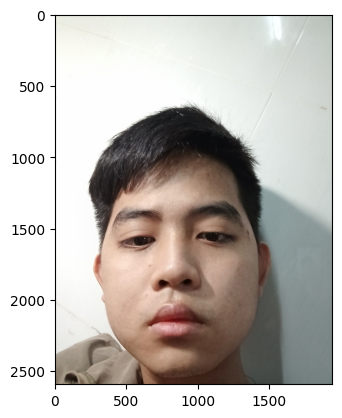

In [6]:

from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model

model=load_model("/content/drive/MyDrive/Face/face.h5")
img=load_img('/content/drive/MyDrive/Face/Phong (6).jpg')
plt.imshow(img)
plt.show()

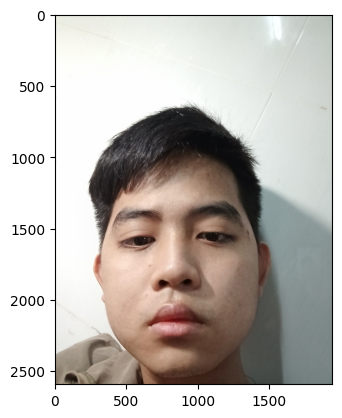

In [7]:
mg=load_img('/content/drive/MyDrive/Face/Phong (6).jpg',target_size=(200,200))
plt.imshow(img)
     

In [10]:
import cv2

class_name = ['SƠN LÂM','QUANG NHẬT ','QUỐC PHONG','TOÀN QUÂN ','NGỌC QUÝ ','THÀNH QUYẾT ','KIM THOA ','ANH VIỆT ','TẤN VŨ ']

img = cv2.imread('/content/drive/MyDrive/Hand/Nhat (6).jpg')
img = cv2.resize(img, (200, 200))
img = img.reshape(1, 200, 200, 3)
img = img.astype('float32')
img = img/255


predict=model.predict(img)
print("Đây là bạn: ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

1/1 [==============================] - 0s 52ms/step
Đây là bạn:  TOÀN QUÂN  [7.9869915e-06 5.3296090e-19 2.0040001e-05 8.8375789e-01 1.9019354e-02
 9.7140387e-02 3.2006319e-08 5.4227545e-05]
0.8837579


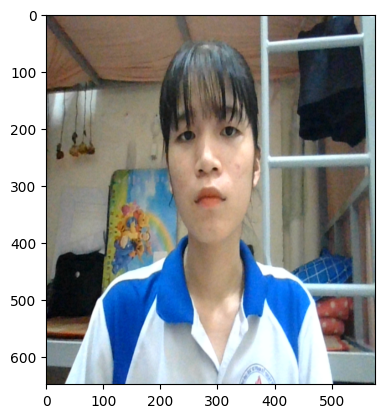

1/1 [==============================] - 0s 204ms/step
Đây là bạn:  KIM THOA  [2.7285183e-20 6.4315245e-34 1.6085427e-26 4.7832265e-18 1.6523659e-16
 2.8926577e-15 1.0000000e+00 1.0651544e-19]
1.0


In [11]:
# test 1
img1=load_img('/content/drive/MyDrive/Face/Thoa (3).png')
plt.imshow(img1)
plt.show()

img1=load_img('/content/drive/MyDrive/Face/Thoa (3).png',target_size=(200,200))
img1=img_to_array(img1)
img1=img1.reshape(1,200,200,3)
img1=img1.astype('float32')
img1=img1/255
predict=model.predict(img1)
print("Đây là bạn: ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))
 

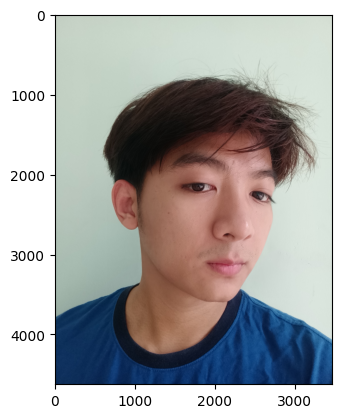

1/1 [==============================] - 0s 87ms/step
Đây là bạn:  ANH VIỆT  [2.0991887e-14 1.2573508e-24 1.7778830e-13 3.4946495e-13 5.7194060e-17
 4.4110066e-10 1.3665171e-19 1.0000000e+00]
1.0


In [12]:
# test 2
img2=load_img('/content/drive/MyDrive/Face/Viet (5).jpg')
plt.imshow(img2)
plt.show()

img2=load_img('/content/drive/MyDrive/Face/Viet (5).jpg',target_size=(200,200))
img2=img_to_array(img2)
img2=img2.reshape(1,200,200,3)
img2=img2.astype('float32')
img2=img2/255
predict=model.predict(img2)
print("Đây là bạn: ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))